In [4]:
from scipy import constants as c
import numpy as np

In [5]:
P = 1.5*1e-3 #Watts
lam = 1555*1e-9 #meters
nu = c.c/lam
E = c.Planck*nu

In [6]:
freq = 1e6
DC = 16/100
window = 1/(freq*DC)

In [7]:
N = P/E*window
print(N*1e-9)

73.38798058620857


In [8]:
data = {
    'freq': [0.2,0.25,0.4,0.8,1],
    'photon number': [366.93990293104287*1e9,293.5519223448343*1e9,183.46995146552143 *1e9,91.73497573276072*1e9 , 73.38798058620857*1e9],
    'mean voltage': [0.004002960140360398,0.0032351408143490275,0.0017809078705775191,0.0010337649062949878, 0.0018919513163977448],
    'error': [0.0009522635353343386,0.0011325243948582496,0.00045376277138968376,0.00021447903940126294, 0.0003652690257306736]
}

In [9]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [10]:
pars = np.polyfit(np.sort(data['mean voltage'][:]), np.sort(data['photon number'][:]),1)

y = 102909717137990x+-44028708584


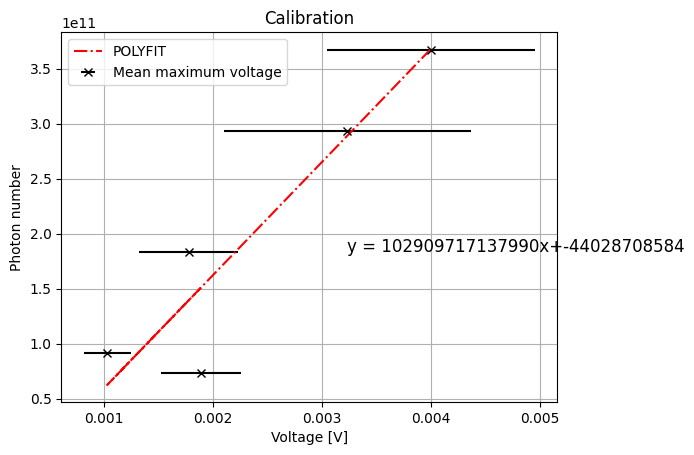

In [11]:
plt.errorbar(data['mean voltage'][:],data['photon number'][:],xerr=data['error'][:],linestyle='',marker='x', color='black',label='Mean maximum voltage')
plt.plot(data['mean voltage'][:],np.polyval(pars, data['mean voltage'][:]),color='red',linestyle='-.',label='POLYFIT')
plt.ylabel(r'Photon number')
plt.xlabel('Voltage [V]')
plt.grid()
plt.title('Calibration')
plt.text(data['mean voltage'][1],data['photon number'][-3],f"y = {pars[0]:.0f}x+{pars[1]:.0f}",size='large')
plt.legend()

print(f"y = {pars[0]:.0f}x+{pars[1]:.0f}")

In [12]:
print(np.polyval(pars,0.0014622362968749942)*1e-6/5634)

18.89414538811696


In [13]:
print(np.polyval(pars,0.0005476358830514037))

12328345235.777016


In [14]:
print(f"y = {pars[0]} x + {pars[1]}")

y = 102909717137989.62 x + -44028708583.656105


In [15]:
print(0.00146*5600/(1.88*1e9))

4.348936170212766e-09


In [16]:
fs = 1e8
R = 1
C = 3/(2*np.pi*R*fs)
print('nF : ',C*1e9)

nF :  4.7746482927568605


In [17]:
C = C/2
fcut = 1/(2*np.pi*C*R)
print(fcut*1e-6)

66.66666666666666


In [44]:
import os
import numpy as np
import h5py
path = r'C:\Users\ricca\Desktop\MAGISTRALE\QTLab2324\DATA ANALYSIS\OPTIMUM\CALIBRATION DATA\\'
I, Q, P = [], [], []
for filename in os.walk(path):
    for file in filename[2]:
            with h5py.File(path+file,'r') as file:
                    if 'Signals' in file.keys():
                        i = -1*np.array(file['Signals']['I'][190000:240000])-np.mean(-1*np.array(file['Signals']['I'][190000:240000]))
                        q = -1*np.array(file['Signals']['Q'][190000:240000])-np.mean(-1*np.array(file['Signals']['Q'][190000:240000]))
                        I.append(i)
                        Q.append(q)
                        P.append(np.unwrap(np.angle(1j*i+q)))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


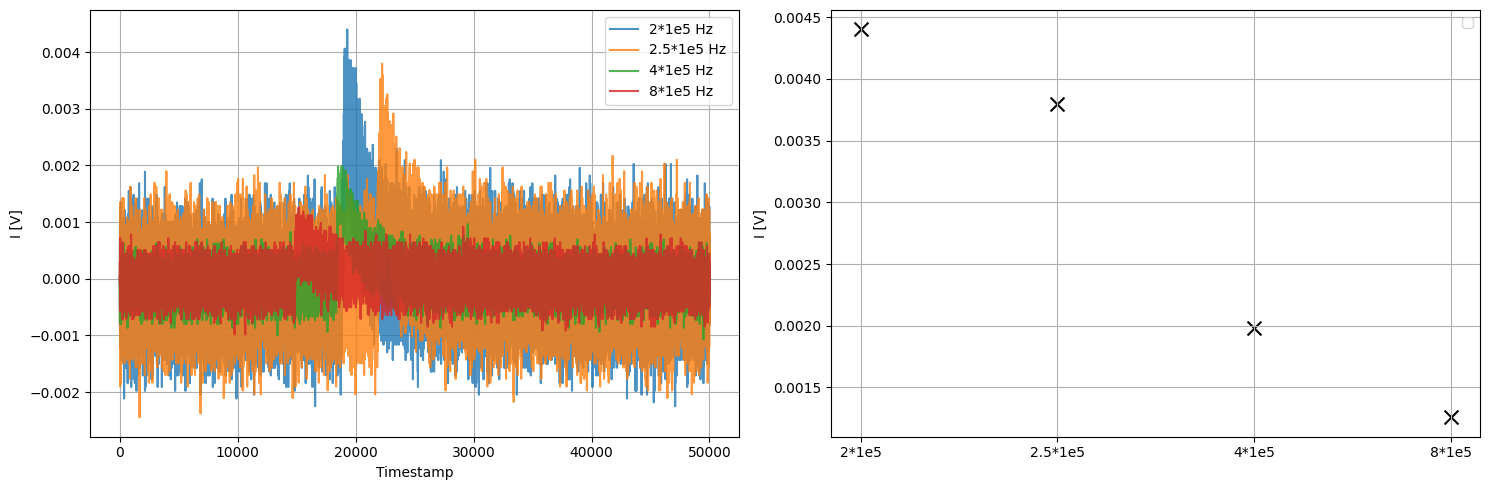

In [45]:
import matplotlib.pyplot as plt
finestra = ['2*1e5','2.5*1e5','4*1e5','8*1e5','1e6']
fig, axs = plt.subplots(1,2,figsize=(15,5))
for i,signal in enumerate(I):
    axs[0].plot(np.linspace(0,signal.shape[0],signal.shape[0]),signal,alpha=0.8,label=f'{finestra[i]} Hz')
    axs[1].scatter(finestra[i],max(signal),s=100,marker='x',color='k')
axs[0].legend()
axs[0].grid()
axs[0].set_ylabel('I [V]')
axs[0].set_xlabel('Timestamp')
axs[1].set_ylabel('I [V]')
axs[1].set_xlabel('Hz')
axs[1].legend()
axs[1].grid()
fig.tight_layout()